# t-SNE Classification on the Iris Dataset with scikit-learn

## By Christopher Hauman
<br>

### This will quickly run through using scikit-learn to perform t-sne classification on the [Iris](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) dataset. This is an adapted example from Datacamp's course on [Unsupervised Learning in Python](https://www.datacamp.com/courses/unsupervised-learning-in-python). If you're not familiar with unsupervised learning, you should start [here](https://nbviewer.jupyter.org/github/chrisman1015/Unsupervised-Learning/blob/master/K-Means%20Classification%20on%20the%20Iris%20Dataset%20with%20scikit-learn/K-Means%20Classification%20on%20the%20Iris%20Dataset%20with%20scikit-learn.ipynb).
<br>

### Note: This assumes you have basic knowledge of python data science basics. If you don't, or encounter something you're not familiar with, don't worry! You can get a crash course in my guide, [Cleaning MLB Statcast Data using pandas DataFrames and seaborn Visualization](https://nbviewer.jupyter.org/github/chrisman1015/Cleaning-Statcast-Data/blob/master/Cleaning%20Statcast%20Data/Cleaning%20Statcast%20Data.ipynb).
<br>

***
t-SNE (t-Distributed Stochastic Neighbor Embedding) is an algorithm for reducing the dimensionality of data primarily for visualization. Essentially, it allows one to see how high-dimensional data is grouped. To see some great examples, check out Laurens van der Maaten's [page](https://lvdmaaten.github.io/tsne/), which has a ton of great example of t-SNE in action.

<br>
This algorithm is particularly useful for gaining quick insight into high dimensional data. t-SNE will transfrom any data into two dimensions quickly and easily. Let's import our basic packages:

In [70]:
# import packages
# datasets has the Iris dataset
from sklearn import datasets

# pandas and numPy for DataFrames and arrays
import pandas as pd
import numpy as np

# pyplot and seaborn for plots
import matplotlib.pyplot as plt
import seaborn as sns

# TSNE Model
from sklearn.manifold import TSNE

In [71]:
# load dataset
iris = datasets.load_iris()

We'll import the data as usual and create a DataFrame with it:

In [87]:
# load the data and target values
X, y = iris.data, iris.target

# create DataFrame with iris data
df = pd.DataFrame(X, columns = iris.feature_names)
df2 = df.copy()
df3 = df.copy()
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We see the iris data has four dimensions: sepal length, sepal width, petal length, and petal width. The t-SNE algorithm will reduce this to two dimensions with no additional information about the data.

Now it's time to intialize and fit the model:

In [82]:
# initialize the model
model = TSNE(learning_rate=100, random_state=2)

# fit the model to the Iris Data
transformed = model.fit_transform(X)

The t-SNE algorithm returns a two-dimensional grid of x and y values, each with no scale or dimension:
<br>

To make visualization easier, we'll create a dataframe with these values. We'll then add the target names back in so we can plot it:

In [83]:
df = pd.DataFrame(transformed)
df.columns = ['x', 'y']
df['species'] = y
df.head()

,x,y,species
0,-16.567120,-14.909160,0
1,-17.005198,-17.604240,0
2,-15.914274,-17.248156,0
3,-16.201323,-17.750107,0
4,-16.164906,-14.843614,0


We can use a scatterplot to see what the t-SNE algorithm created:

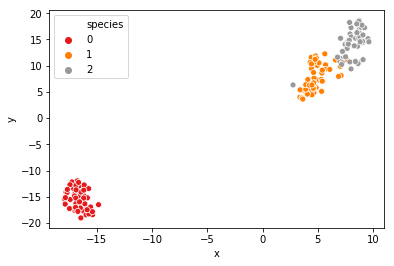

In [81]:
sns.scatterplot(x='x', y='y', data=df, hue='species',palette="Set1")

Despite having no information about the target values, the algorithm was able to reduce the dimensionality of the data from 4 to 2, while still clearly differentiating between the species of iris. Remember, it's not the axis of the plot which is important. To illustrate this, we'll run everything again with a different random_state for the model:

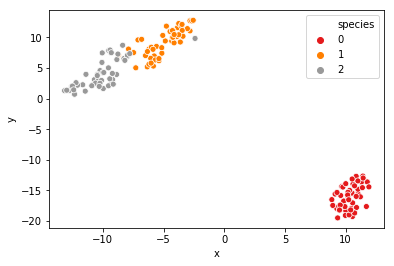

In [84]:
# initialize the model
model2 = TSNE(learning_rate=100, random_state=1)
transformed2 = model2.fit_transform(X)

df2 = pd.DataFrame(transformed2)
df2.columns = ['x', 'y']
df2['species'] = y

sns.scatterplot(x='x', y='y', data=df2, hue='species',palette="Set1")

We see the model performed the same reduction of dimensionality with equal success but entirely different axes. The axes are always arbitrary.
<br>

It's that simple. If you want to read more about t-SNE, head on over [here](https://distill.pub/2016/misread-tsne/). 
<br>

When you're ready, head on over to my next example of t-SNE, 